In [2]:
# Import required libraries
import pretty_midi
import numpy as np
import pandas as pd
import os
from collections import Counter
from scipy.stats import entropy

# Define complexity functions
def compute_note_density(notes, duration):
    return len(notes) / duration if duration > 0 else 0

def compute_pitch_entropy(notes):
    pitches = [note.pitch for note in notes]
    pitch_counts = Counter(pitches)
    total = sum(pitch_counts.values())
    probs = [count / total for count in pitch_counts.values()]
    return entropy(probs)

def compute_rhythmic_variability(notes):
    start_times = sorted(note.start for note in notes)
    iois = np.diff(start_times)
    return np.std(iois) if len(iois) > 1 else 0

def compute_average_polyphony(notes, total_time, resolution=0.01):
    times = np.arange(0, total_time, resolution)
    polyphony = np.zeros_like(times)
    for note in notes:
        start_idx = int(note.start / resolution)
        end_idx = int(note.end / resolution)
        polyphony[start_idx:end_idx] += 1
    return np.mean(polyphony)

def compute_unique_pitches(notes):
    return len(set(note.pitch for note in notes))

# Analyze MIDI files and include recall success rate at noise = 0.5
midi_folder = 'midi_files/'
recall_folder = 'outputs/'
results = []

for file in os.listdir(midi_folder):
    if file.endswith('.mid'):
        file_path = os.path.join(midi_folder, file)
        try:
            midi = pretty_midi.PrettyMIDI(file_path)
            all_notes = []
            for instrument in midi.instruments:
                all_notes.extend(instrument.notes)
            if not all_notes:
                continue

            duration = midi.get_end_time()
            note_density = compute_note_density(all_notes, duration)
            pitch_entropy = compute_pitch_entropy(all_notes)
            rhythmic_variability = compute_rhythmic_variability(all_notes)
            avg_polyphony = compute_average_polyphony(all_notes, duration)
            unique_pitches = compute_unique_pitches(all_notes)

            # Calculate % successful recall at noise=0.5
            recall_csv = os.path.join(recall_folder, file.replace('.mid', '.csv'))
            recall_success_pct = np.nan
            if os.path.exists(recall_csv):
                df_recall = pd.read_csv(recall_csv)
                recall_05 = df_recall[np.isclose(df_recall['Noise Level'], 0.5)]
                if not recall_05.empty:
                    successful = recall_05[recall_05['Recall Accuracy'] == 1.0]
                    recall_success_pct = (len(successful) / len(recall_05)) * 100

            results.append({
                'File': file,
                'Note Density': note_density,
                'Pitch Entropy': pitch_entropy,
                'Rhythmic Variability': rhythmic_variability,
                'Average Polyphony': avg_polyphony,
                'Unique Pitches': unique_pitches,
                'Recall % @ 0.5 Noise': recall_success_pct
            })
        except Exception as e:
            print(f"Error processing {file}: {e}")

# Display results as DataFrame
df = pd.DataFrame(results)
df = df.sort_values('File')
df.reset_index(drop=True, inplace=True)
df


C:\Users\willw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


,File,Note Density,Pitch Entropy,Rhythmic Variability,Average Polyphony,Unique Pitches,Recall % @ 0.5 Noise
0,Bambi.mid,9.406824,3.054163,1.489088e-01,3.321646,32,50.0
1,Dr.Zhivago.mid,18.276964,3.371145,1.240421e-01,10.738061,57,50.0
2,Fildan-SetetesAirHina.mid,31.412168,3.377918,8.385248e-02,5.419010,60,70.0
3,FuneralSong.mid,9.319833,2.669448,1.415912e-01,5.445111,26,60.0
4,IAintGoinDown.mid,29.855422,2.838136,8.950875e-02,12.111165,30,40.0
5,Japan.mid,10.789691,3.157829,2.316944e-01,8.735673,36,50.0
6,JumpForMyLove.mid,27.378555,3.190944,7.528610e-02,3.488793,57,30.0
7,Lady.mid,23.480336,3.175421,8.927009e-02,9.329481,50,30.0
8,Mask.mid,43.564427,3.293440,5.801155e-02,5.335838,50,90.0
9,MeandBobbyMcGee.mid,29.757520,3.426000,7.095027e-02,6.278549,56,80.0


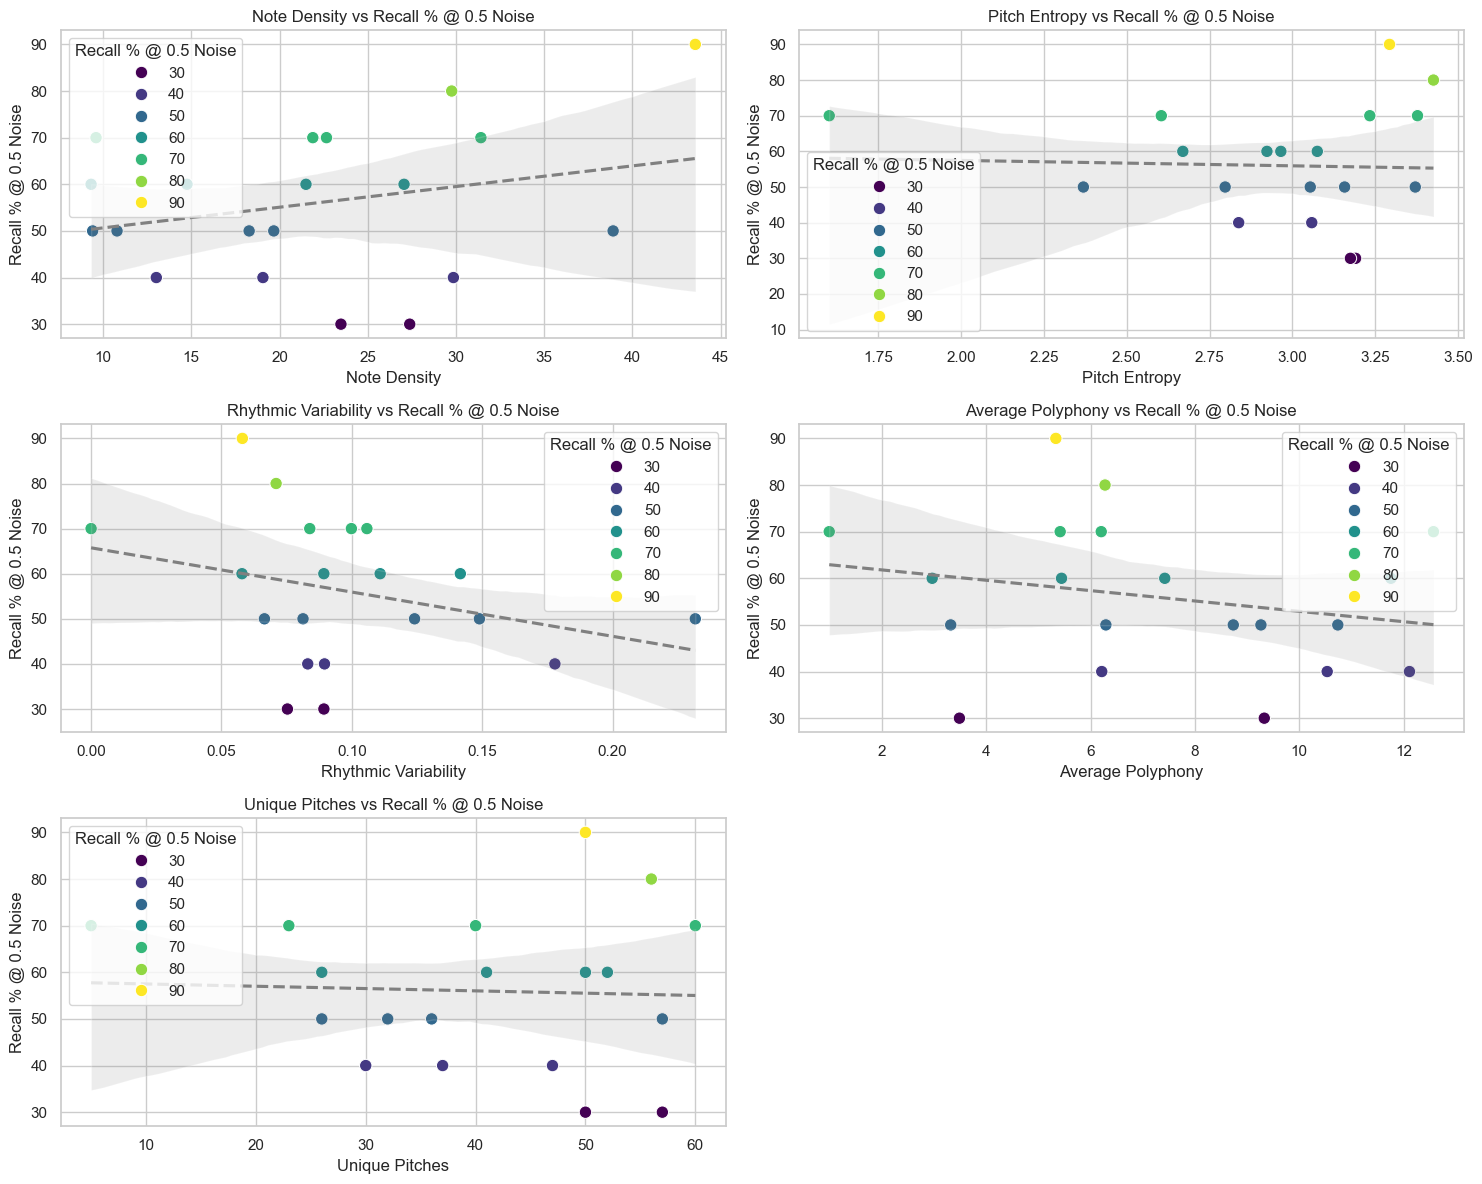

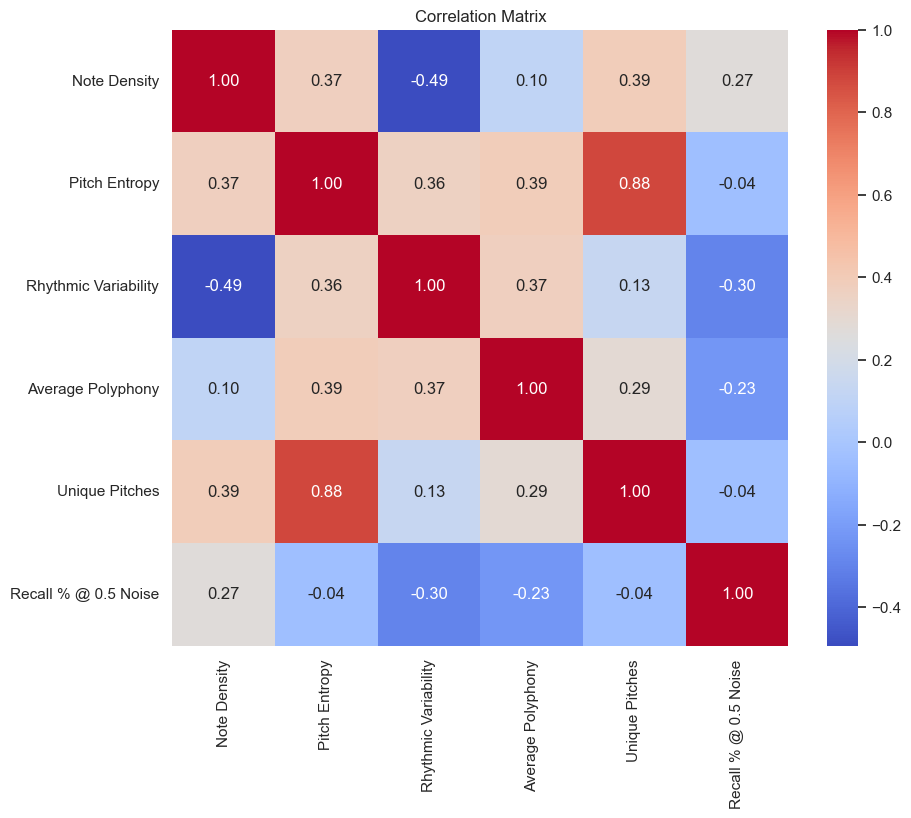

In [3]:
# Cell 6: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style
sns.set(style="whitegrid", context="notebook")

# Define features to plot against recall
features = ['Note Density', 'Pitch Entropy', 'Rhythmic Variability', 'Average Polyphony', 'Unique Pitches']

# Create scatter plots
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df, x=feature, y='Recall % @ 0.5 Noise', hue='Recall % @ 0.5 Noise', palette='viridis', s=80)
    sns.regplot(data=df, x=feature, y='Recall % @ 0.5 Noise', scatter=False, color='gray', line_kws={'linestyle':'--'})
    plt.title(f'{feature} vs Recall % @ 0.5 Noise')

plt.tight_layout()
plt.show()

# Cell 7: Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[features + ['Recall Accuracy']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix')
plt.show()


In [8]:
metrics = ['Note Density', 'Pitch Entropy', 'Rhythmic Variability', 'Average Polyphony', 'Unique Pitches']

# Compute averages
avg_all = df[metrics].mean()
avg_high = df[df['Recall % @ 0.5 Noise'] >= 60][metrics].mean()
avg_low = df[df['Recall % @ 0.5 Noise'] < 41][metrics].mean()

# Combine into table
summary_df = pd.DataFrame({
    'Metric': metrics,
    'Avg (All Files)': avg_all.values,
    'Avg (High Recall Files)': avg_high.values,
    'Avg (Low Recall Files)': avg_low.values
})

# Optional: round values for readability
summary_df = summary_df.round(2)

# Display styled table
summary_df.style.set_caption("Comparison of MIDI Complexity Metrics by Recall Group") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]
    }])

,Metric,Avg (All Files),Avg (High Recall Files),Avg (Low Recall Files)
0,Note Density,22.070000,23.150000,22.560000
1,Pitch Entropy,2.960000,2.920000,3.060000
2,Rhythmic Variability,0.100000,0.080000,0.100000
3,Average Polyphony,7.220000,6.440000,8.340000
4,Unique Pitches,40.350000,40.300000,44.200000
